In [1]:
import time
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from scipy.stats import norm
from equation_initial_layer import EuropeanCall
from config_initial_layer import EuropeanCallConfig
from solver_initial_layer import FeedForwardModel
plt.rc('axes',grid=True)

C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorboard\compat\tensorf

In [2]:
def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
the 1 time of pre-train
step:     0,loss: 2.6246e+02,  elapsed time  13
step:  1000,loss: 8.5574e-04,  elapsed time  29
step:  2000,loss: 1.5844e-03,  elapsed time  41
step:  3000,loss: 8.2499e-03,  elapsed time  54
step:  4000,loss: 4.3236e-03,  elapsed time  66
step:  5000,loss: 1.5540e-03,  elapsed time  79
Finish pre train
step:     0,loss: 2.5658e+02,  elapsed time  79
step:  1000,loss: 6.6135e+00,  elapsed time  92
step:  2000,loss: 5.3933e+00,  elapsed time 104
step:  3000,loss: 5.4331e+00,  elapsed time 117
step:  4000,loss: 8.1865e+00,  elapsed time 130
step:  5000,loss: 6.5302e+00,  elapsed time 142
step:  6000,loss: 7.7161e+00,  elapsed time 155
step:  7000,loss: 5.5647e+00,  elapsed time 167
step:  8000,loss: 6.1007e+00,  elapsed time 180
step:  9000,loss: 5.5375e+00,  elapsed time 192
step: 10000,loss: 5.6732e+00,  elapsed time 205
step: 11000,loss: 5.2224e+00,  elapsed time 217
step: 12000,lo

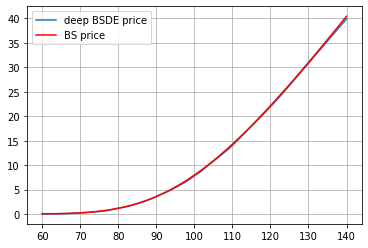

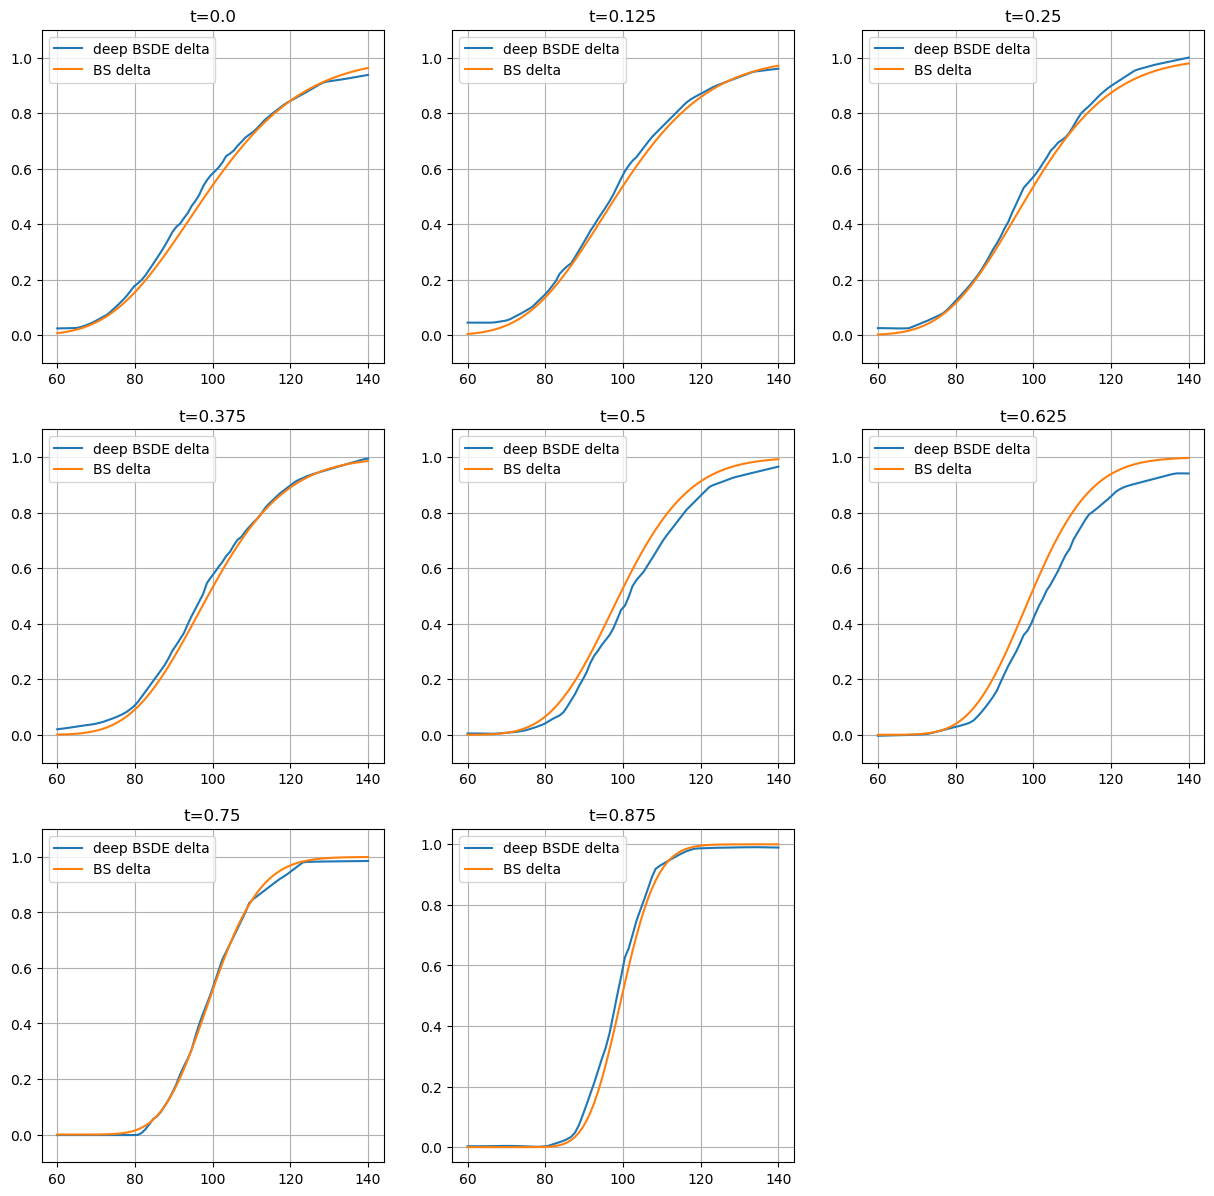

In [3]:
dim, total_time, num_time_interval=1,1,8
r=0
sigma=0.2
k=100
x0_range=[60,140]
eurOption=EuropeanCall(dim, total_time, num_time_interval,sigma,r,k,x0_range)

tf.reset_default_graph()
with tf.Session() as sess:
    model = FeedForwardModel(sess,eurOption,EuropeanCallConfig)
    model.build()
    f_graphs,z_graphs= model.train()


fig, ax = plt.subplots()
ax.plot(np.linspace(x0_range[0],x0_range[1], 82),f_graphs.flatten(),label='deep BSDE price')
ax.plot(np.linspace(x0_range[0],x0_range[1], 82),blackscholes_price(k, total_time, np.linspace(x0_range[0],x0_range[1], 82), sigma,r, 0, 'call'),'r',label='BS price')
ax.legend(loc=0)

b=int(num_time_interval/3)+1

plt.figure(figsize=(15,b*5),dpi=100)
for i in range(len(z_graphs)):
    a=i+1
    ax = plt.subplot(b*100+30+a)
    ax.plot(np.linspace(x0_range[0],x0_range[1], 82),np.array(z_graphs[i]).flatten(),label='deep BSDE delta')
    ax.plot(np.linspace(x0_range[0],x0_range[1], 82),norm.cdf((np.log(np.linspace(x0_range[0],x0_range[1], 82)/k)+(r+sigma*sigma/2)*(1-i/num_time_interval))/(sigma*np.sqrt(1-i/num_time_interval))),label='BS delta')
    ax.set_title('t='+str(i/num_time_interval))
    ax.legend(loc=0)
    if i!=len(z_graphs)-1:
        ax.set_ylim([-0.1, 1.1])